Multiclass skin disease classification

Step 1 : Importing Essential Libraries
Step 2: Making Dictionary of images and labels
Step 3: Reading and Processing Data
Step 4: Data Cleaning
Step 5: Exploratory data analysis (EDA)
Step 6: Loading & Resizing of images
Step 7: Train Test Split
Step 8: Normalization
Step 9: Label Encoding
Step 10: Train validation split
Step 11: Model Building (CNN)
Step 12: Setting Optimizer & Annealing
Step 13: Fitting the model
Step 14: Model Evaluation (Testing and validation accuracy, confusion matrix, analysis of misclassified instances)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

# Step 1 : Importing Essential Libraries

# Step 2: Making Dictionary of images and labels

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image


'''loading metadata.csv to skin_df using pandas
   add images to dataframe
   add path to dataframe
   use lambda fn:adding resized image path to dataframe
   printing the number anf types of labels
'''

skin_df = pd.read_csv('/content/gdrive/My Drive/HAM10000/HAM10000_metadata.csv')
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('HAM10000/', '*', '*.jpg'))}
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
print(skin_df['dx'].value_counts())

# step 3: Reading and Processing Data

KeyError: ignored

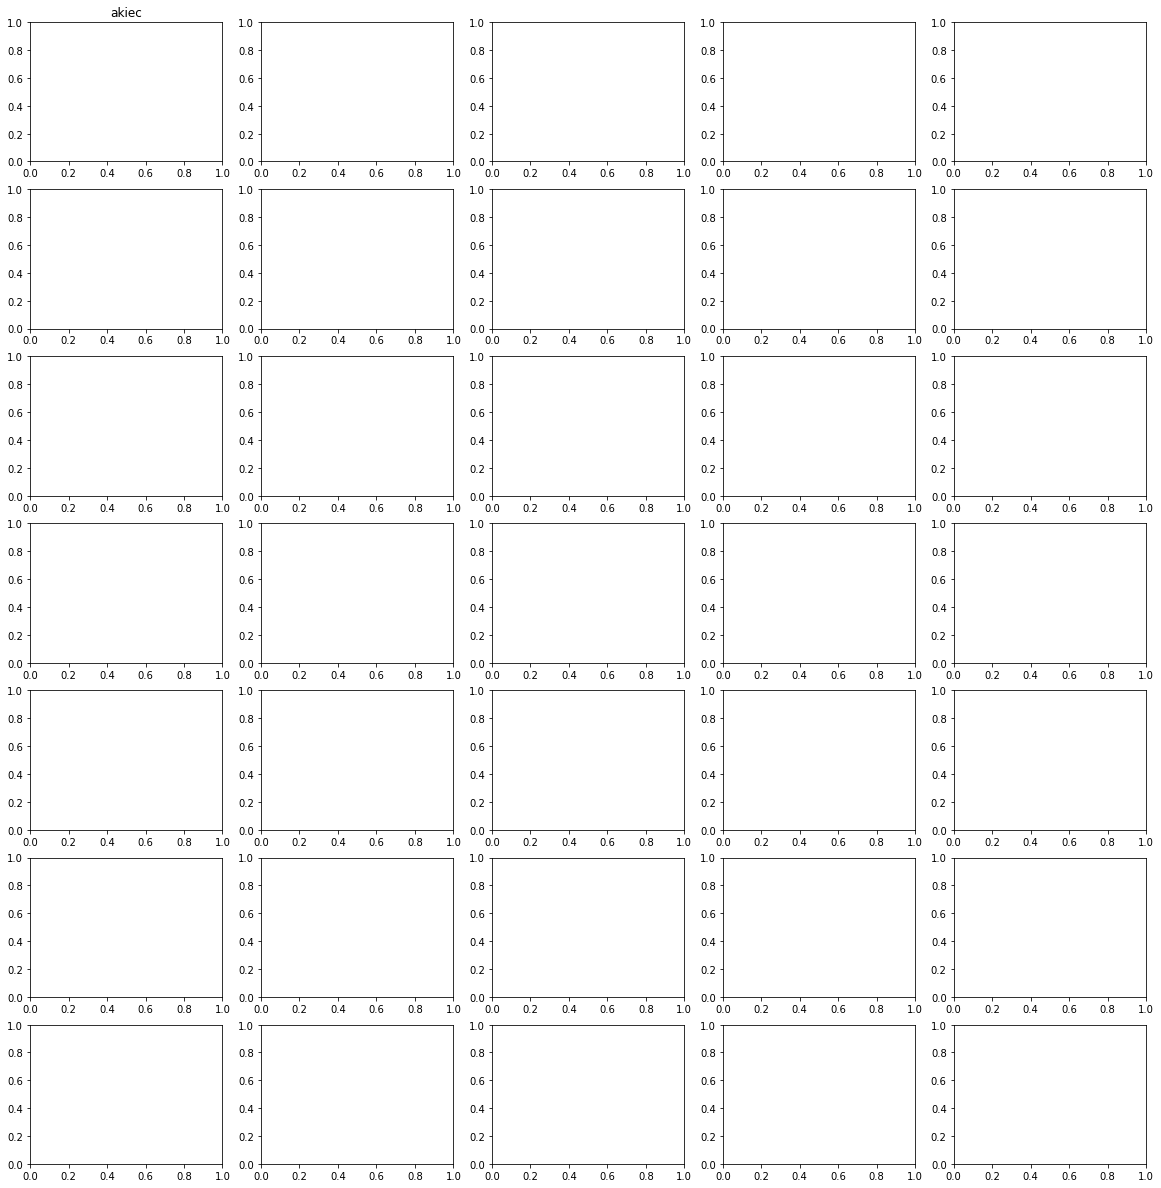

In [ ]:

'''choosing 5 samples and visualizing resized image of each lesion type'''

n_samples = 5  # number of samples for plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
'''final header with path,image added'''
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000\HAM10000_images_part_1\ISIC_0027419.jpg,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000\HAM10000_images_part_1\ISIC_0025030.jpg,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000\HAM10000_images_part_1\ISIC_0026769.jpg,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000\HAM10000_images_part_1\ISIC_0025661.jpg,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,HAM10000\HAM10000_images_part_2\ISIC_0031633.jpg,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."


In [ ]:
skin_df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dataset          object
path             object
image            object
dtype: object

In [ ]:
skin_df.describe()

,age
count,10015.000000
mean,51.863828
std,16.920252
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


# Step 4: Data Cleaning

In [ ]:
#data cleaning

''' data cleaning:we check for Missing values and datatype of each field
    only age has null values which is 57 so we will fill the null values by their mean
    check the presence of null values again'''

skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
path             0
image            0
dtype: int64

In [ ]:
print(skin_df['image'][0].shape)

(224, 224, 3)


In [ ]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)

In [ ]:
skin_df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
path            0
image           0
dtype: int64

# Step 5: Exploratory data analysis

In [ ]:
skin_df= skin_df[skin_df['age'] != 0]
skin_df= skin_df[skin_df['sex'] != 'unknown']

<AxesSubplot:title={'center':'CELL TYPE'}, ylabel='Count'>

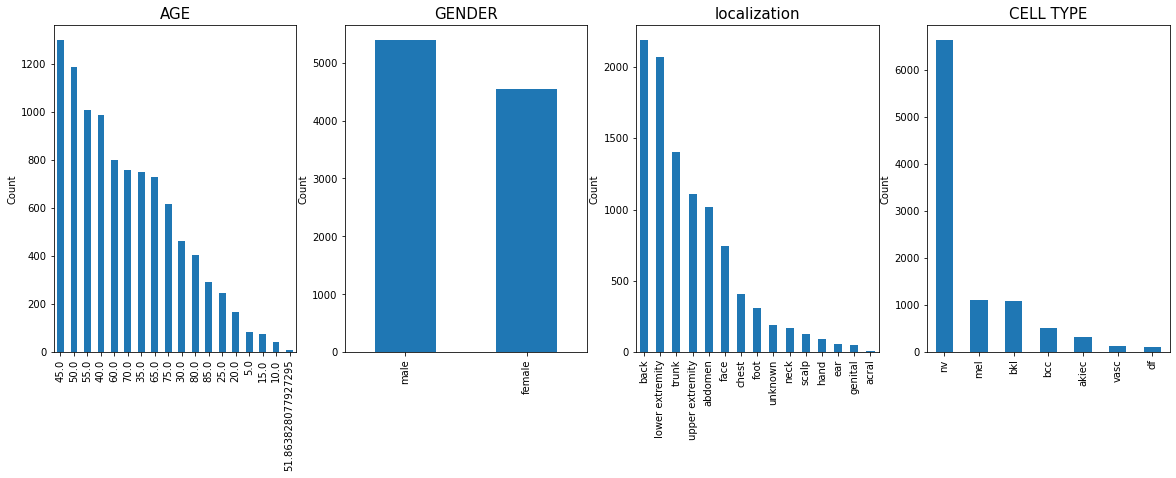

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
skin_df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
skin_df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
skin_df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
skin_df['dx'].value_counts().plot.bar()


<AxesSubplot:ylabel='dx'>

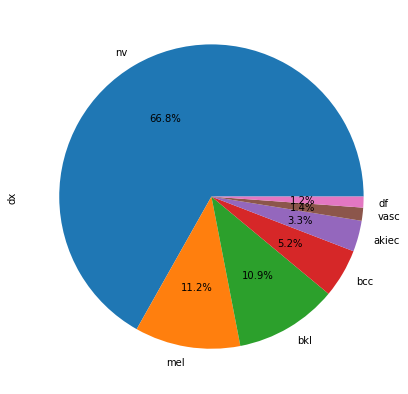

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
skin_df['dx'].value_counts().plot.pie(autopct="%1.1f%%")



In [ ]:
import seaborn as sns

<AxesSubplot:title={'center':'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

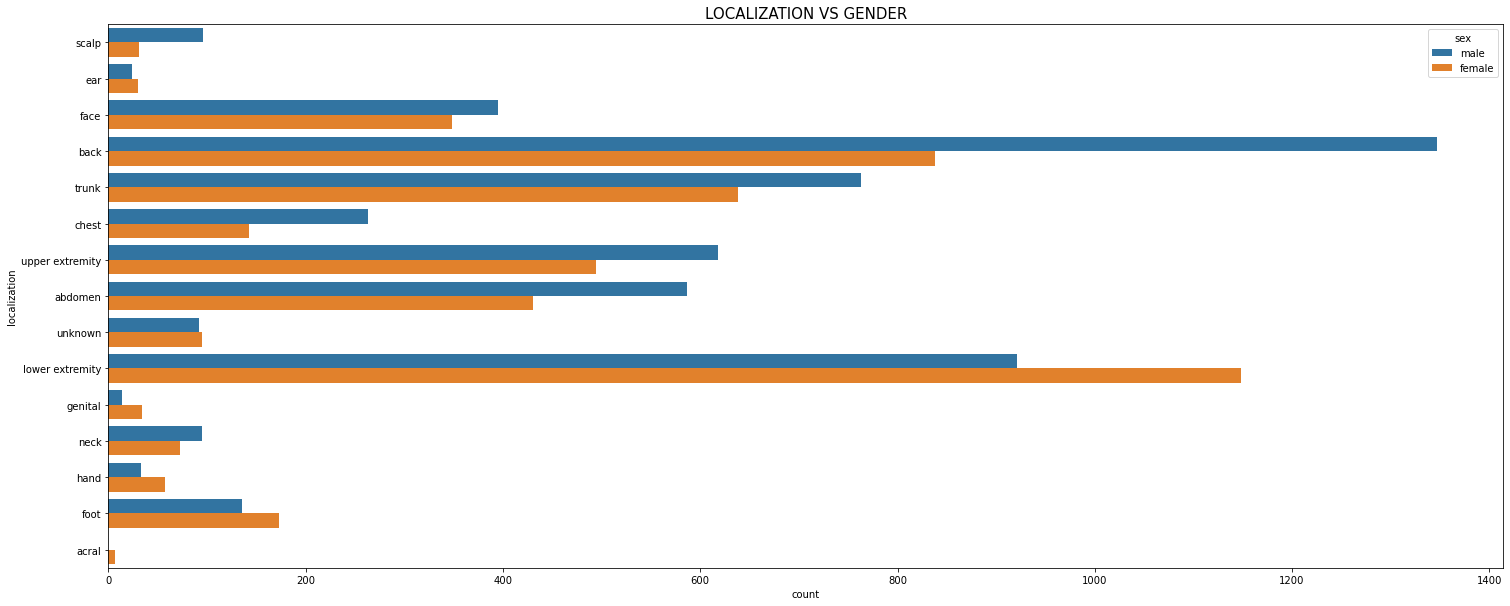

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=skin_df)

In [ ]:
#Back are is the most affected among people and more prominent in men.
#Infection on Lower extremity of the body is more visible in women.
#Some unknown regions also show infections and it's visible in men, women and other genders.
#The acral surfaces show the least infection cases that too in men only. Other gender groups don't show this kind of infection.

<AxesSubplot:title={'center':'LOCALIZATION VS CELL TYPE'}, xlabel='count', ylabel='localization'>

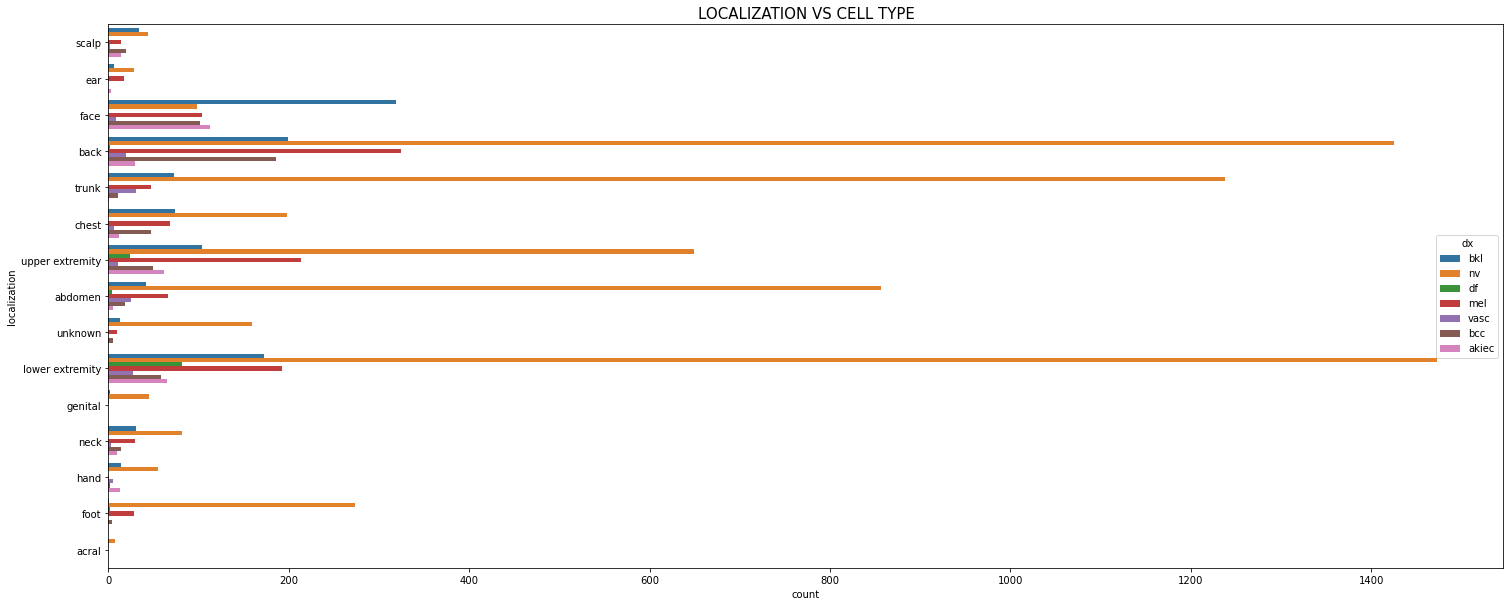

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='dx',data=skin_df)

In [ ]:
#The face is infected the most by Benign keratosis-like lesions.
#Body parts(except face) are infected the most by Melanocytic nevi.

<AxesSubplot:title={'center':'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

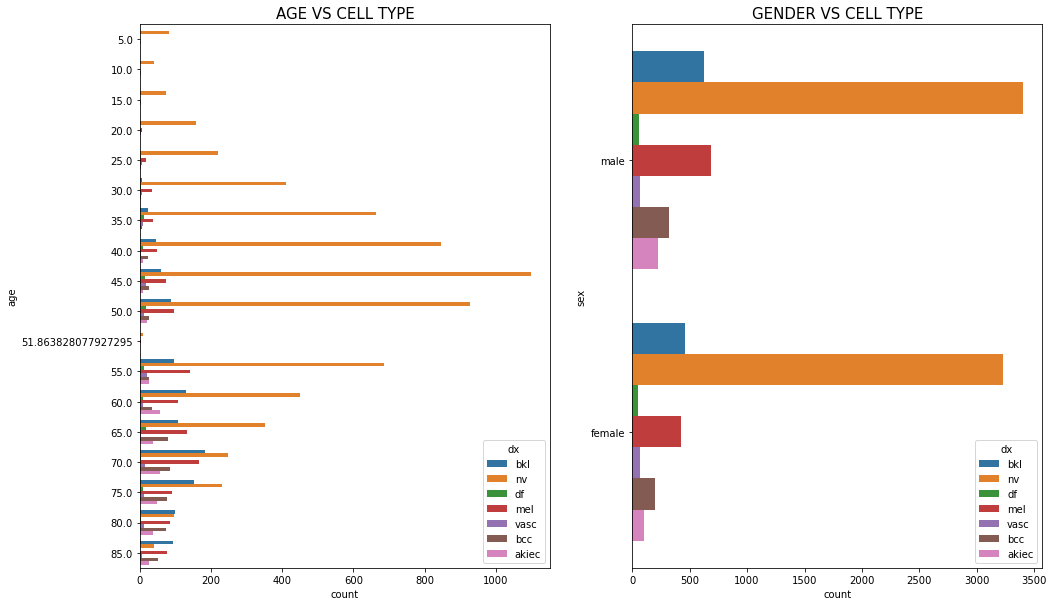

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='dx',data=skin_df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='dx',data=skin_df)

In [ ]:
#The age group between 0-75 years is infected the most by Melanocytic nevi.The people aged 80-90 are affected more by Benign keratosis-like lesions.

#All the gender groups are affected the most by Melanocytic nevi.